In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
%matplotlib inline

# initializations
seaborn.set_theme()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
# Path
path = "/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv"

# Reading the data

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [5]:
df.tail(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9987,9988,15588839,Mancini,606,Spain,Male,30.0,8,180307.73,2,1.0,1.0,1914.41,0
9988,9989,15589329,Pirozzi,775,France,Male,30.0,4,0.00,2,1.0,0.0,49337.84,0
9989,9990,15605622,McMillan,841,Spain,Male,28.0,4,0.00,2,1.0,1.0,179436.60,0
9990,9991,15798964,Nkemakonam,714,Germany,Male,33.0,3,35016.60,1,1.0,0.0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53.0,4,88381.21,1,1.0,0.0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36.0,2,0.00,1,1.0,0.0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28.0,7,155060.41,1,1.0,0.0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29.0,2,0.00,2,0.0,0.0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


## Basic Statistic 

In [7]:
df.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10002.0,5.001500e+03,2887.472338,1.00,2501.25,5001.50,7.501750e+03,10000.00
CustomerId,10002.0,1.569093e+07,71931.769345,15565701.00,15628524.75,15690732.00,1.575323e+07,15815690.00
CreditScore,10002.0,6.505551e+02,96.661615,350.00,584.00,652.00,7.180000e+02,850.00
Age,10001.0,3.892231e+01,10.487200,18.00,32.00,37.00,4.400000e+01,92.00
Tenure,10002.0,5.012498e+00,2.891973,0.00,3.00,5.00,7.000000e+00,10.00
Balance,10002.0,7.649111e+04,62393.474144,0.00,0.00,97198.54,1.276478e+05,250898.09
NumOfProducts,10002.0,1.530194e+00,0.581639,1.00,1.00,1.00,2.000000e+00,4.00
HasCrCard,10001.0,7.055294e-01,0.455827,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,10001.0,5.149485e-01,0.499801,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,10002.0,1.000833e+05,57508.117802,11.58,50983.75,100185.24,1.493837e+05,199992.48


In [8]:
df.describe(include="object")

,Surname,Geography,Gender
count,10002,10001,10002
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5458


## Unique values

In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## Distribution

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

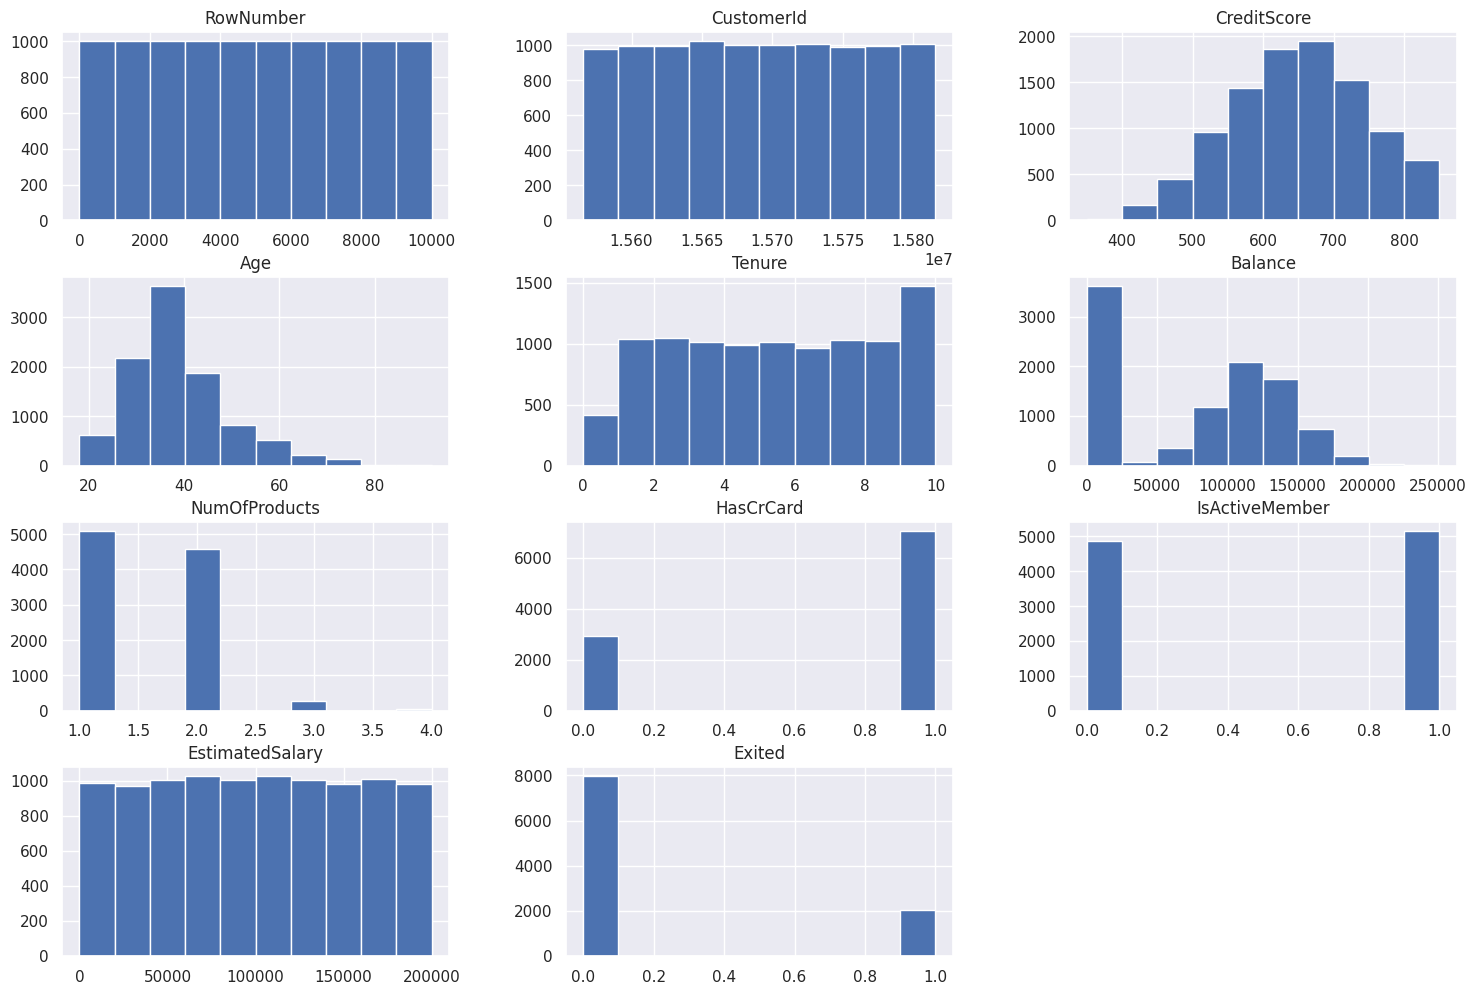

In [10]:
df.hist(figsize=(18,12))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


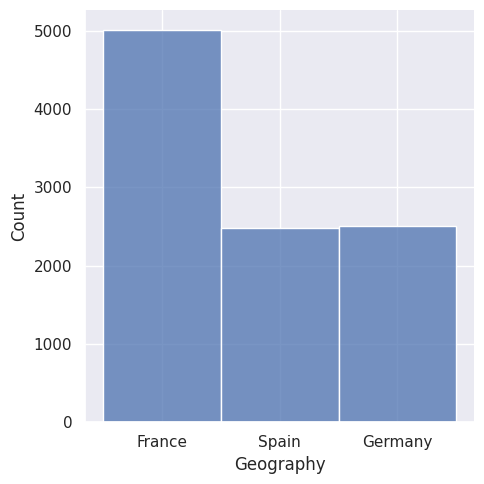

In [11]:
seaborn.displot(data=df["Geography"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


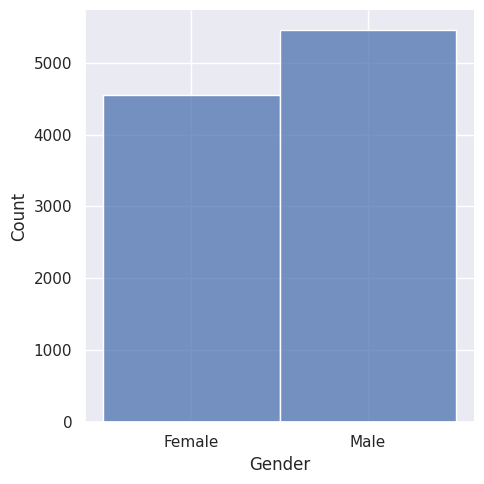

In [12]:
seaborn.displot(df['Gender'])

In [13]:
df.skew(numeric_only = True)

RowNumber         -8.301804e-07
CustomerId         1.379949e-03
CreditScore       -7.187787e-02
Age                1.011292e+00
Tenure             1.126740e-02
Balance           -1.412948e-01
NumOfProducts      7.454846e-01
HasCrCard         -9.019671e-01
IsActiveMember    -5.982974e-02
EstimatedSalary    2.320765e-03
Exited             1.471157e+00
dtype: float64

## Handling Missing Values & Duplicates

In [14]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
df.duplicated().sum()

2

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Dropping Unnecessary Columns

In [20]:
df = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
shadow = df.copy()

In [21]:
df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.00,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.00,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,Female,29.00,4,115046.74,4,1.0,0.0,119346.88,1
10,528,France,Male,31.00,6,102016.72,2,0.0,0.0,80181.12,0
11,497,Spain,Male,24.00,3,0.00,2,1.0,0.0,76390.01,0
12,476,France,Female,34.00,10,0.00,2,1.0,0.0,26260.98,0
13,549,France,Female,25.00,5,0.00,2,0.0,0.0,190857.79,0


## Outliers and Boxplot

In [22]:
df.shape

(9998, 11)

In [23]:
list = df.columns.tolist()
list.remove("Geography")
list.remove("Age")
list.remove("Gender")
list

['CreditScore',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

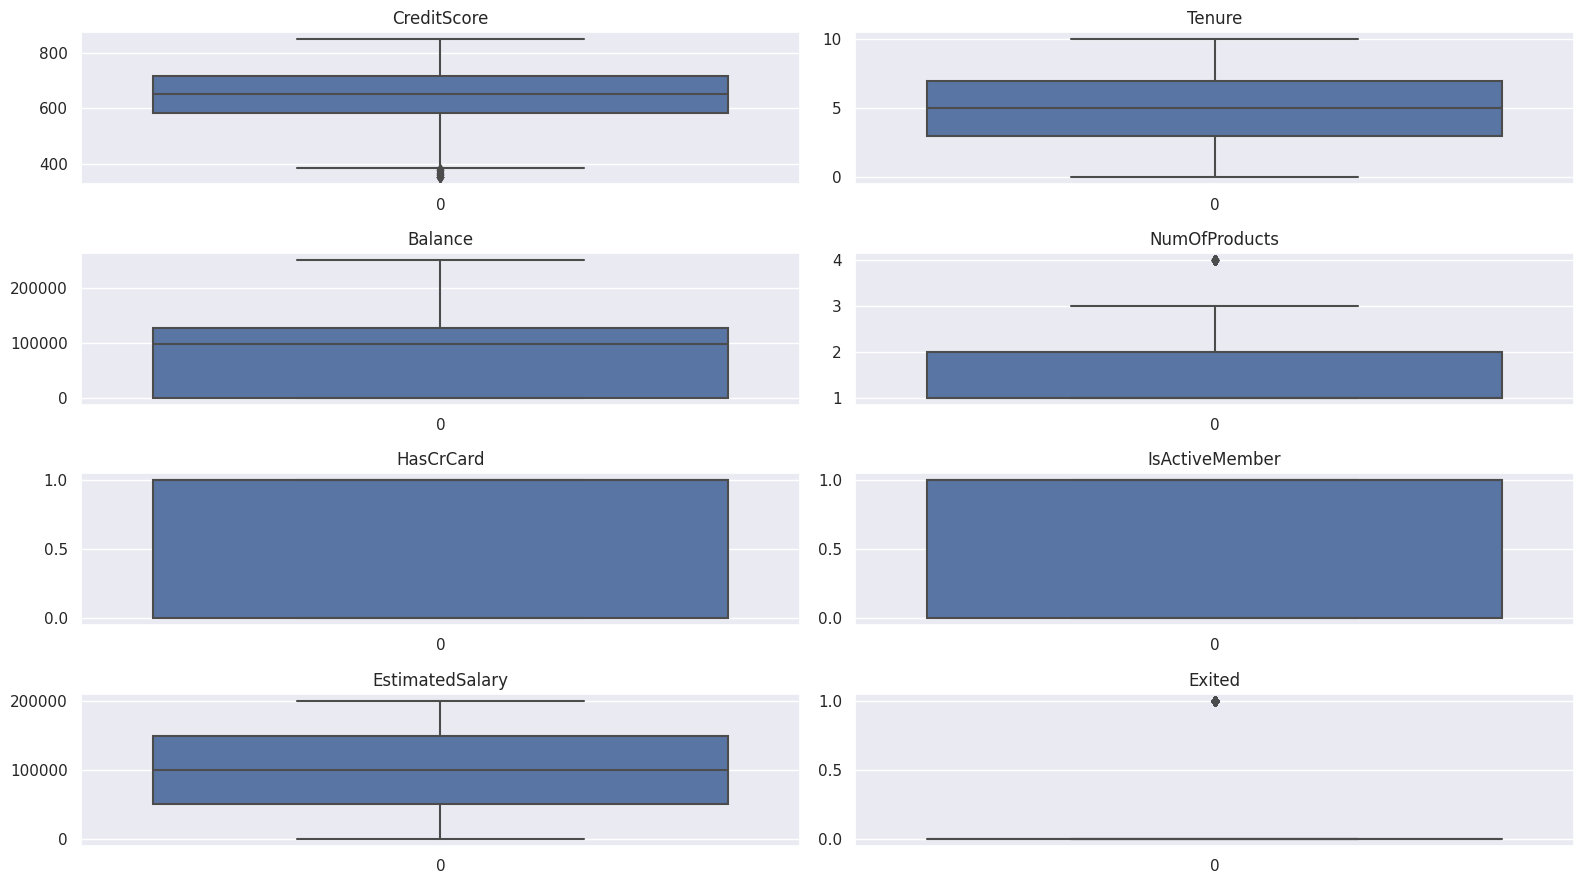

In [24]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16,9))
axs = axs.flatten()
for idx,column in enumerate(list):
    seaborn.boxplot(data=df[column], ax=axs[idx])
    axs[idx].set_title(column)
plt.tight_layout()

Not much of outliers are present. Only in credit score column, there are some very low values which makes sense cause low credit score is a normal phenomena. Also in NumOfProducts column, the outlier value is 4 which is also normal because a person can use multiple products from a bank if he/she deems it necessary. Other than these, there are not much outliers according to this boxplot illustration. So, moving on.

## Correlations

<Axes: >

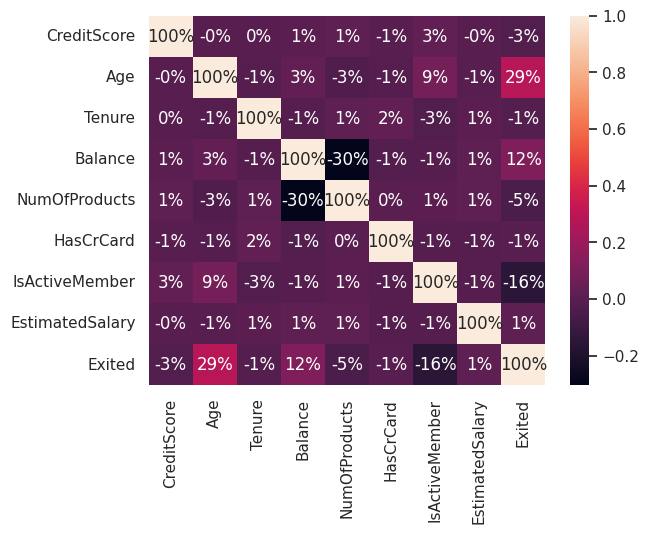

In [25]:
corr = shadow.drop(['Gender', "Geography"], axis=1)
corr_matrix = corr.corr()
seaborn.heatmap(corr_matrix, annot=True, fmt=".0%")

## Data Profiling

In [26]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Encoding Necessary Features

In [27]:
df = pd.get_dummies(data=df)

In [28]:
df.head(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42.00,2,0.00,1,1.0,1.0,101348.88,1,True,False,False,True,False
1,608,41.00,1,83807.86,1,0.0,1.0,112542.58,0,False,False,True,True,False
2,502,42.00,8,159660.80,3,1.0,0.0,113931.57,1,True,False,False,True,False
3,699,39.00,1,0.00,2,0.0,0.0,93826.63,0,True,False,False,True,False
5,645,44.00,8,113755.78,2,1.0,0.0,149756.71,1,False,False,True,False,True
7,376,29.00,4,115046.74,4,1.0,0.0,119346.88,1,False,True,False,True,False
10,528,31.00,6,102016.72,2,0.0,0.0,80181.12,0,True,False,False,False,True
11,497,24.00,3,0.00,2,1.0,0.0,76390.01,0,False,False,True,False,True
12,476,34.00,10,0.00,2,1.0,0.0,26260.98,0,True,False,False,True,False
13,549,25.00,5,0.00,2,0.0,0.0,190857.79,0,True,False,False,True,False


# Model Training & Evaluation

In [29]:
features = df.drop(["Exited"], axis=1) 
label = df["Exited"]

In [30]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=0)

## Model Training

In [31]:
LR = LogisticRegression()
CT = DecisionTreeClassifier()
RF = RandomForestClassifier()

### Logistic Regression

In [32]:
LR.fit(feature_train, label_train)

LogisticRegression()

In [33]:
lr_prediction = LR.predict(feature_test)

In [34]:
accuracy_score(label_test, lr_prediction) * 100

78.14999999999999

In [35]:
print(classification_report(label_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1582
           1       0.33      0.05      0.08       418

    accuracy                           0.78      2000
   macro avg       0.56      0.51      0.48      2000
weighted avg       0.70      0.78      0.71      2000



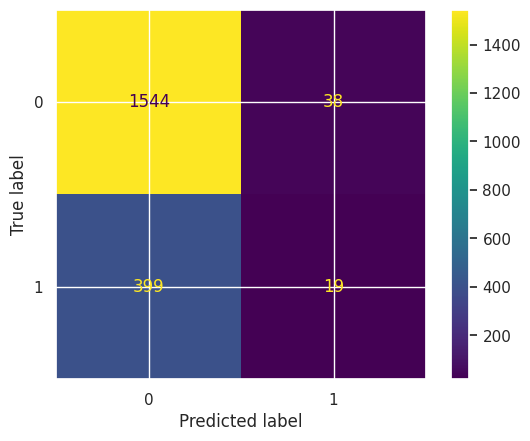

In [36]:
ConfusionMatrixDisplay(confusion_matrix(label_test, lr_prediction),display_labels=LR.classes_).plot()

In [37]:
confusion_matrix(label_test, lr_prediction)

array([[1544,   38],
       [ 399,   19]])

### Decision Tree

In [38]:
CT.fit(feature_train, label_train)

DecisionTreeClassifier()

In [39]:
ct_prediction = CT.predict(feature_test)

In [40]:
accuracy_score(label_test, ct_prediction) * 100

81.05

In [41]:
print(classification_report(label_test, ct_prediction))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1582
           1       0.55      0.54      0.55       418

    accuracy                           0.81      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.81      0.81      0.81      2000



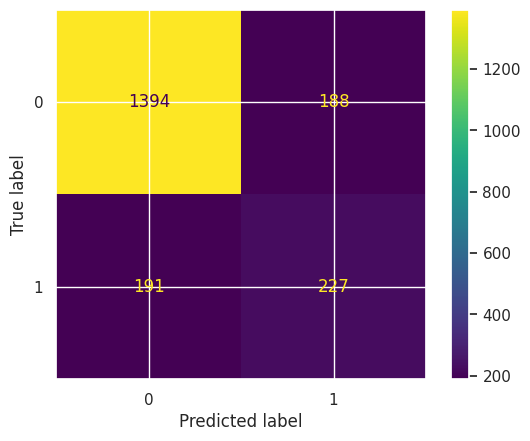

In [42]:
ConfusionMatrixDisplay(confusion_matrix(label_test, ct_prediction),display_labels=CT.classes_).plot()

### Random Forest

In [43]:
RF.fit(feature_train, label_train)

RandomForestClassifier()

In [44]:
rf_prediction = RF.predict(feature_test)

In [45]:
accuracy_score(label_test, rf_prediction) * 100

85.75

In [46]:
print(classification_report(label_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1582
           1       0.75      0.47      0.58       418

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.84      2000



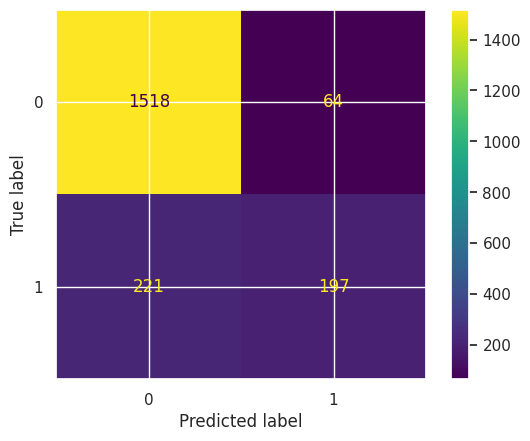

In [47]:
ConfusionMatrixDisplay(confusion_matrix(label_test, rf_prediction),display_labels=RF.classes_).plot()